<a href="https://colab.research.google.com/github/97DongHyeokOH/Machine-learning-Deep-learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_4%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# k-최근접 이웃 회귀(regression)
# -> 임의의 어떤 숫자를 예측

In [2]:
# 농어 데이터 준비

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

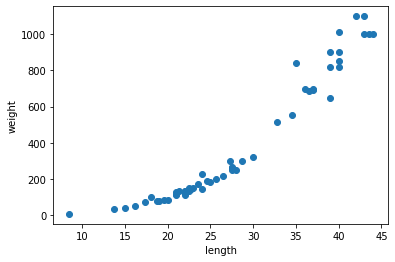

In [3]:
# 산점도 그려보기

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 데이터를 훈련세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 사이킷런에 사용할 훈련세트는 2차월 배열이여야 함 -> numpy 배열 크기를 바꾸는 reshape()

test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [6]:
# reshape를 이용해 test_input, train_input을 2차원 배열로 바꿈
# reshape의 크기를 -1로 지정하면 나머지 원소 개수로 모두 채워라는 의미

train_input= train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
# 결졍계수(R^2)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

# 결정계수 (coefficient of determination)
print(knr.score(test_input, test_target))

0.9928094061010639


In [8]:
# mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환해줌

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 결과에서 예측이 평균적으로 19g정도 타깃값과 다르다

19.157142857142862


In [9]:
# 과대적합, 과소적합
# 앞에서 훈련한 모델을 사용해 후녈ㄴ세트의 결정계수 점수 확인

print(knr.score(train_input, train_target))

# 테스트 세트를 사용한 점수보다 점수가 낮게 나온다 -> underfitting

0.9698823289099255


In [10]:
# 훈련세트에서 점수가 좋았지만 테스트 세트에서 점수가 나쁘다면 모델이 훈련세트에 과대적합(overfitting) 되었다고 함
# -> 훈련세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입해 새로운 샘플에 대한 예측을 만들 때, 잘 동작하지 못 함

# 훈련 세트보다 테스트 세트의 점수가 너무 높거나, 두 점수가 모두 너무 낮은 경우에 모델이 훈련 세트에 과소적합(underfitting) 되었다고 함
# -> 모델이 너무 단순해 훈련 세트에 적절히 훈련되지 않은 경우

In [12]:
# 위의 과소적합을 해결하기 위해서 모델을 조금 더 복잡하게 만들어 준다.-> 이웃의 개수 k를 줄여준다 (5 -> 3)

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


In [ ]:
# 일반적으로는 훈련 세트의 점수가 테스트 세트의 점수보다 조금 더 높다.